<a href="https://colab.research.google.com/github/pvlakshm/AIML/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The goal of this exercise is to learn a classification of fruit based on its
# weight and texture. After learning a classifier, we will visualize it.

# Step 0: create the data
# We have fruits weighing from 130 gm to 145 gm, and their texture can be
# rough (0) or smooth (1).
# We have 3 classes of fruit: Orange, Pear, Apple.

import numpy as np
# [Wt, texture] are the features
X = np.array([[130, 0], [131, 0], [132, 0], [134, 0], [136, 0],
              [140, 0], [141, 0], [142, 0], [144, 0], [145, 0],
              [140, 1], [141, 1], [142, 1], [144, 1], [145, 1]])

# Orange (0), Pear (1), Apple (2) are the classes of fruit.
y = np.array([0, 0, 0, 0, 0,
              1, 1, 1, 1, 1,
              2, 2, 2, 2, 2])

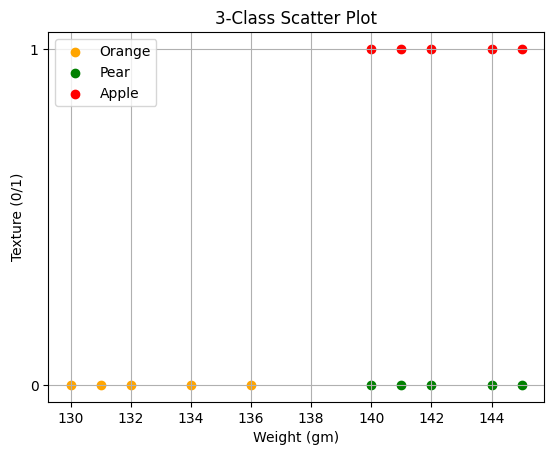

In [2]:
# Step 2: Visualize the data
# Split data by class
X_Orange = X[y == 0]
X_Pear   = X[y == 1]
X_Apple  = X[y == 2]

f_names = ["Weight (gm)", "Texture (0/1)"]
c_names = ["Orange", "Pear", "Apple"]

# Plot
import matplotlib.pyplot as plt
plt.scatter(X_Orange[:, 0], X_Orange[:, 1], color = "orange", label = c_names[0])
plt.scatter(X_Pear[:, 0], X_Pear[:, 1], color = "green", label = c_names[1])
plt.scatter(X_Apple[:, 0], X_Apple[:, 1], color = "red", label = c_names[2])
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.title('3-Class Scatter Plot')
plt.yticks([0, 1])
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# ======== Decisiontree ========
# Looking at the data, we can classify the fruit as follows:
#   # we start with a heterogenous sample of size 15 => [5, 5, 5].
#   # 'Weight' seems the best way to isolate oranges. Therefore,
#   if (weight < say, 138)
#       fruit is Orange (regardless of the texture).
#       # we have classified 5 samples => [5, 0, 0]
#   else
#       # fruit might be either an Pear or Apple => [0, 5, 5]
#       # i.e., we still have a heterogenous sample of size 10
#       # now we need to consider texture to isolate Apple vs Pear
#       if (texture is Bumpy)
#           fruit is Pear.
#           # we have classified 5 samples => [0, 5, 0]
#       else
#           fruit is Apple.
#           # we have classified 5 samples => [0, 0, 5]
#
# Finally, each of the classes will have samples of the same fruit (homogeneous)
#
# The goal is to learn this decision tree and the splitting rule used at each
# stage.

# Step 3: train the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 42)
clf = clf.fit(X, y)

In [ ]:
# Step 4: Predict a fruit and plot it
# Example: weight = 143g, texture = smooth (1)
sample = np.array([[143, 1]])
predicted_class = clf.predict(sample)[0]
predicted_label = c_names[predicted_class]

print(f"A fruit weighing {sample[0][0]}g with texture {sample[0][1]} is predicted to be: '{predicted_label}'.")


A fruit weighing 143g with texture 1 is predicted to be: 'Apple'.


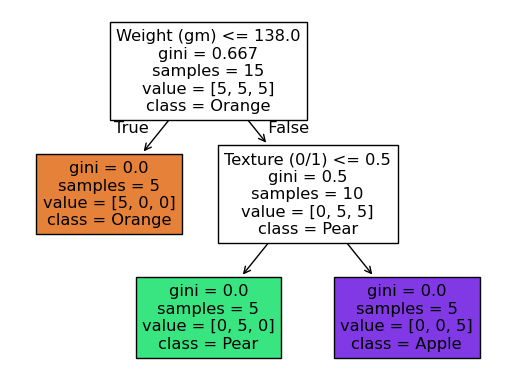

In [ ]:
# Step 5: Visualize the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(clf, feature_names=f_names, class_names = c_names, filled = True)
plt.show()